In [45]:
import numpy as np
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
iris_data = np.concatenate([iris['data'], np.reshape(iris['target'], (-1, 1))], axis=1)

df = pd.DataFrame(data=iris_data, columns=iris['feature_names'] + ['target'])
print('Data shape:', df.shape)
print('Target classes:', df['target'].unique())
print('Sample data: \n')
df.head()

Data shape: (150, 5)
Target classes: [0. 1. 2.]
Sample data: 



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [46]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, stratify=df['target'].values, test_size = 0.30, random_state = 0)

X_train = df_train.drop(['target'], axis=1)
y_train = df_train['target']

X_test = df_test.drop(['target'], axis=1)
X_test = df_test.drop(['target'], axis=1)
y_test = df_test['target']
print('Training data shape: ', X_train.shape)
print('Test data shape: ', X_test.shape)

Training data shape:  (105, 4)
Test data shape:  (45, 4)


In [47]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

X_train_sepal = X_train.drop(['petal length (cm)', 'petal width (cm)'], axis=1)
X_test_sepal = X_test.drop(['petal length (cm)', 'petal width (cm)'], axis=1)
k=1
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train_sepal, y_train)

y_pred = model.predict(X_test_sepal)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc.round(4))

Accuracy: 0.6222


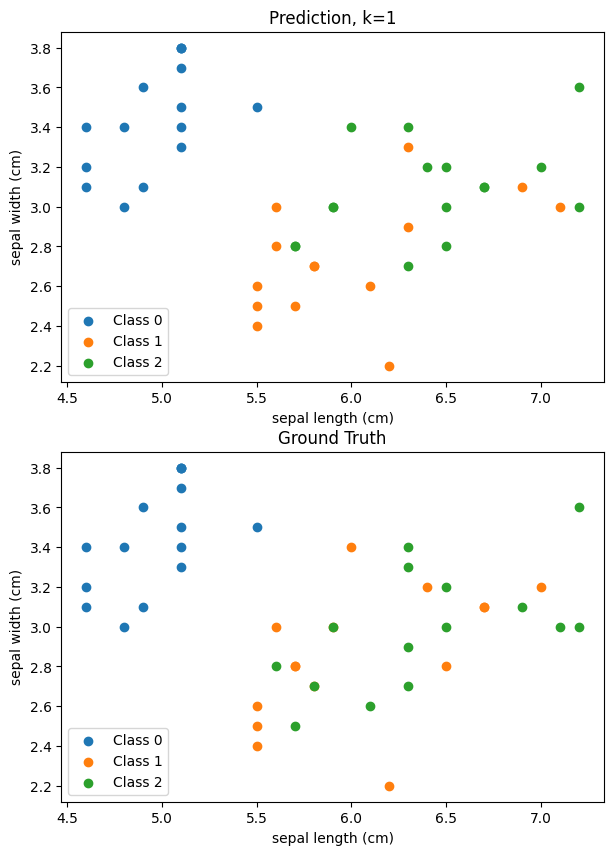

In [48]:
import matplotlib.pyplot as plt
def draw_classification_result(y_pred, k):
  X_test_sl = X_test['sepal length (cm)']
  X_test_sw = X_test['sepal width (cm)']
  fig, ax = plt.subplots(2,figsize=(7,10))
  ax[0].title.set_text('Prediction, k={}'.format(k))
  ax[0].scatter(X_test_sl[y_pred==0], X_test_sw[y_pred==0],label='Class 0')
  ax[0].scatter(X_test_sl[y_pred==1], X_test_sw[y_pred==1],label='Class 1')
  ax[0].scatter(X_test_sl[y_pred==2], X_test_sw[y_pred==2],label='Class 2')
  ax[0].set_xlabel('sepal length (cm)'); ax[0].set_ylabel('sepal width (cm)');
  ax[1].title.set_text('Ground Truth')
  ax[1].scatter(X_test_sl[y_test==0], X_test_sw[y_test==0],label='Class 0')
  ax[1].scatter(X_test_sl[y_test==1], X_test_sw[y_test==1],label='Class 1')
  ax[1].scatter(X_test_sl[y_test==2], X_test_sw[y_test==2],label='Class 2')
  ax[1].set_xlabel('sepal length (cm)'); ax[1].set_ylabel('sepal width (cm)');
  ax[0].legend(); ax[1].legend(); plt.show();

draw_classification_result(y_pred, k)

Accuracy: 0.6889


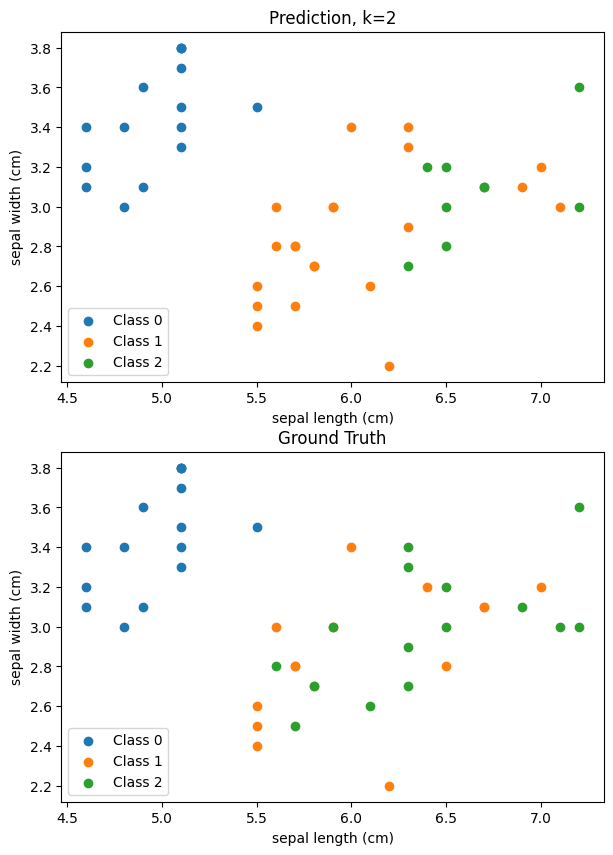

In [49]:
k=2
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train_sepal, y_train)
y_pred = model.predict(X_test_sepal)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc.round(4))

draw_classification_result(y_pred, k)

Accuracy: 0.7556


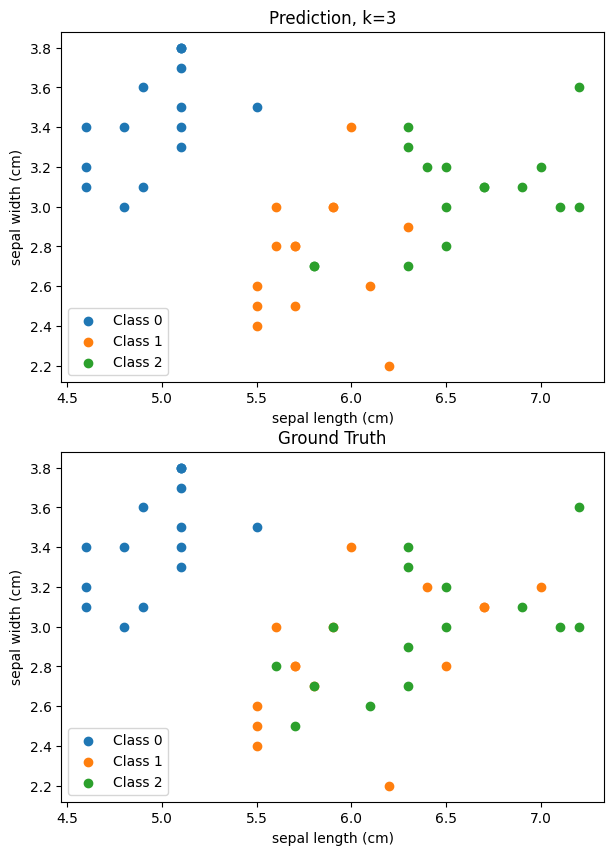

In [50]:
k=3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train_sepal, y_train)
y_pred = model.predict(X_test_sepal)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc.round(4))

draw_classification_result(y_pred, k)

In [93]:
#Exercise 13
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

iris = datasets.load_iris()
iris_data = np.concatenate([iris['data'], np.reshape(iris['target'], (-1, 1))], axis=1)

# DataFrame 생성
df = pd.DataFrame(data=iris_data, columns=iris['feature_names'] + ['target'])

# train, test set 분리
df_train, df_test = train_test_split(df, stratify=df['target'].values, test_size=0.30, random_state=0)

X_train = df_train.drop(['target'], axis=1)
y_train = df_train['target']

X_test = df_test.drop(['target'], axis=1)
y_test = df_test['target']

# 정확도를 저장할 리스트
accuracies1 = []
accuracies2 = []

configurations = {
    'Only Width (2 features)': ['sepal width (cm)', 'petal width (cm)'],
    'Only Length (2 features)': ['sepal length (cm)', 'petal length (cm)'],
    'Only Petal (2 features)': ['petal length (cm)', 'petal width (cm)'],
    'Petal + Sepal (4 features)': ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
}

for config, features in configurations.items():
    X_train_config = X_train[features]
    X_test_config = X_test[features]

    # KNN 분류기 학습
    k = 1
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_config, y_train)

    # 테스트 데이터로 예측
    y_pred = model.predict(X_test_config)

    # 정확도 계산 및 저장
    acc = accuracy_score(y_test, y_pred)
    if(acc == 1):
      ac = acc.round(1)
    else:
      ac = acc.round(4)
    accuracies1.append(ac)

    k = 3
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_config, y_train)

    y_pred = model.predict(X_test_config)
    acc = accuracy_score(y_test, y_pred)
    if(acc == 1):
      ac = acc.round(1)
    else:
      ac = acc.round(4)
    accuracies2.append(ac)

print(accuracies2)
# 왜 리스트에는 1.0인데 데이터프레임에는 1.0000으로 나올까?
# Why does it run as 1.0 in the list but 1.0000 in the frame data? Any solution
# 결과 표시
results_df = pd.DataFrame({'Features': list(configurations.keys()), 'K=1': accuracies1, 'K=3': accuracies2})
results_df.head()

[0.9556, 1.0, 1.0, 1.0]


,Features,K=1,K=3
0,Only Width (2 features),0.9111,0.9556
1,Only Length (2 features),0.9556,1.0000
2,Only Petal (2 features),0.9778,1.0000
3,Petal + Sepal (4 features),0.9778,1.0000
